In [1]:
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

### Universidade Federal de Santa Maria, CCNE, Departamento de Física <br> FSC835 - TÓPICOS ESPECIAIS EM FÍSICA III (Computação Quântica com Qiskit) <br> Prof. Jonas Maziero, Semestre 2021/2, Data: 11 de janeiro de 2022

# Avaliação I

$1.$ No IBMQ temos medidas prontas somente do observável $Z$, cuja base de autovetores é a base padrão: $\{|0\rangle,|1\rangle\}$. Mas vamos considerar que precisamos medir um observável qualquer,
$$\hat{n}\cdot\vec{\sigma} = \begin{bmatrix}
\cos\theta & e^{-i\phi}\sin\theta \\
e^{i\phi}\sin\theta & -\cos\theta \\
\end{bmatrix},$$
de um qubit, com $\theta\in[0,\pi]$ e $\phi\in[0,2\pi)$. Os autovetores de $\hat{n}\cdot\vec{\sigma}$ são
\begin{cases}
|n_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
|n_{-}\rangle = e^{-i\phi}\sin(\theta/2)|0\rangle - \cos(\theta/2)|1\rangle.
\end{cases}
Usando a porta lógica 
$$U(\theta,\phi,\lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix},$$
verifique que
\begin{cases}
U(\theta,\phi,\pi-\phi)|0\rangle = |n_{+}\rangle, \\
U(\theta,\phi,\pi-\phi)|1\rangle = |n_{-}\rangle.
\end{cases}
Verifique também que $U^{\dagger}(\theta,\phi,\lambda) = U(\theta,\pi-\lambda,-\pi-\phi)$. Partindo desses resultados, verifique que
\begin{cases}
Pr(n_{+}|\psi) = Pr(0|\psi'), \\
Pr(n_{-}|\psi) = Pr(1|\psi'),
\end{cases}
com 
$$|\psi'\rangle = U^{\dagger}(\theta,\phi,\pi-\phi)|\psi\rangle.$$
Ou seja, se queremos medir $\hat{n}\cdot\vec{\sigma}$ para um sistema preparado no estado $|\psi\rangle$, podemos fazer isso aplicando primeiro $U^{\dagger}(\theta,\phi,\pi-\phi)$ nesse estado e depois medindo $Z$.

# 1


$$U(\theta,\phi,\pi-\phi)|0\rangle = |n_{+}\rangle
$$

$$U(\theta,\phi,\pi-\phi)|1\rangle = |n_{-}\rangle
$$

$2.$ Considere um qubit preparado no estado $|+\rangle=(|0\rangle+|1\rangle)/\sqrt{2}$ e uma medida do observável $O = (X+Z)/\sqrt{2}$. Calcule analiticamente as probabilidades dos diferentes valores de $O$. Além disso, com base nos resultados obtidos na questão anterior, simule e implemente experimentalmente a preparação de $|+\rangle$ e a medida de $O$ para estimar as probabilidades dos possíveis valores de $O$.

# 2

$3.$ Como já foi dito na 1ª questão, no IBMQ só temos prontas medidas locais de $Z$. Agora vamos considerar que queremos fazer medidas na base de Bell, que é a seguinte base de estados emaranhados de 2 qubits:
\begin{cases}
|B_{00}\rangle := |\Phi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big), \\
|B_{01}\rangle := |\Psi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle + |10\rangle\big), \\
|B_{10}\rangle := |\Phi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle - |11\rangle\big), \\
|B_{11}\rangle := |\Psi_{-}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle - |10\rangle\big).
\end{cases}
Primeiramente, descreva qual é a ação da porta de Hadamard, $H=\frac{1}{\sqrt{2}}\big(|0\rangle\langle0|+|0\rangle\langle1|+|1\rangle\langle0|-|1\rangle\langle1|\big)$, na base computacional, $\{|0\rangle,|1\rangle\}$. 
Seguindo, descreva qual é a ação da porta lógica de negação controlada, $C_{x}^{ab} = |0\rangle_{a}\langle 0|\otimes I_{b} + |1\rangle_{a}\langle 1|\otimes X_{b}$, na base computacional de 2 qubits, $\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\}$. 
Feito isso, verifique que
\begin{equation}
C_{x}^{01}(H\otimes I)|jk\rangle = |B_{jk}\rangle
\end{equation}
para $j,k=0,1$.
Também de forma análoga à questão 1, se preparamos os 2 qubits em um estado qualquer $|\Psi\rangle$ e queremos fazer uma medida na base de Bell, podemos fazer isso primeiramente aplicando uma transformação unitária $V$ no estado $|\Psi\rangle$, para obter $|\Psi'\rangle = V|\Psi\rangle$, e depois fazendo uma medida na base computacional $\{|jk\rangle\}_{j,k=0}^{1}$. Escreva $V$ em termos de $H$ e $C_{x}$.

# 3

A ação da porta Hadamard é :
\begin{align}
    &H|0\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    1 \\
    \end{bmatrix}
    &H|1\rangle = \left(\frac{1}{\sqrt{2}}\right)\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
    \end{bmatrix}\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    -1 \\
    \end{bmatrix}\\
    &H|0\rangle = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}+\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\right)
    &H|1\rangle = \frac{1}{\sqrt{2}}\left(\begin{bmatrix}
    1 \\
    0 \\
    \end{bmatrix}-\begin{bmatrix}
    0 \\
    1 \\
    \end{bmatrix}\right)\\
    &\boxed{H|0\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right) = |+\rangle}
    &\boxed{H|1\rangle  = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right) = |-\rangle}\\
 \end{align}
 
 
 A ação da porta $C_{NOT}$ é :
\begin{align}
    &C_{x}^{ab}|00\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=|00\rangle
    &C_{x}^{ab}|01\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=|01\rangle\\
    &C_{x}^{ab}|10\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=|11\rangle
    &C_{x}^{ab}|11\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=|10\rangle\\
\end{align}


 Agora vamos mostrar que 
 \begin{equation}
C_{x}^{01}(H\otimes I)|jk\rangle = |B_{jk}\rangle
\end{equation}


\begin{equation}
    (H\otimes I^{2x2}) = \frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}
\end{equation}


$$(H\otimes I)|00\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$$

$$(H\otimes I)|01\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right)$$
    
     
$$(H\otimes I)|10\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    0 \\
    -1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|00\rangle-|10\rangle\right)$$
    
    
 
$$(H\otimes I)|11\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    -1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|01\rangle-|11\rangle\right)$$
    
    
\begin{align}
    &(H\otimes I)|00\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)
    &(H\otimes I)|01\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right)\\
    &(H\otimes I)|10\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|10\rangle\right)
    &(H\otimes I)|11\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|11\rangle\right)\\
\end{align}


\begin{align}
    &|\Phi_{+}\rangle = C_{x}^{01}(H\otimes I)|00\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)
    &|\Psi_{+}\rangle = C_{x}^{01}(H\otimes I)|01\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\\
    &|\Phi_{-}\rangle = C_{x}^{01}(H\otimes I)|10\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)
    &|\Psi_{-}\rangle = C_{x}^{01}(H\otimes I)|11\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\\
\end{align}

A ação da porta $C_{NOT}$ é :
\begin{align}
    &C_{x}^{ab}|00\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=|00\rangle
    &C_{x}^{ab}|01\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=|01\rangle\\
    &C_{x}^{ab}|10\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=|11\rangle
    &C_{x}^{ab}|11\rangle =\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=|10\rangle\\
\end{align}

 Agora vamos mostrar que 
 \begin{equation}
C_{x}^{01}(H\otimes I)|jk\rangle = |B_{jk}\rangle
\end{equation}


\begin{equation}
    (H\otimes I^{2x2}) = \frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}
\end{equation}


$$(H\otimes I)|00\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)$$

$$(H\otimes I)|01\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right)$$
    
     
$$(H\otimes I)|10\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 \\
    0 \\
    -1 \\
    0 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|00\rangle-|10\rangle\right)$$
    
    
 
$$(H\otimes I)|11\rangle =\frac{1}{\sqrt{2}}\begin{bmatrix}
    1 & 0 & 1 & 0 \\
    0 & 1 & 0 & 1 \\
    1 & 0 & -1 & 0 \\
    0 & 1 & 0 & -1\\
    \end{bmatrix}.\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}
    0 \\
    1 \\
    0 \\
    -1 \\
    \end{bmatrix}=\frac{1}{\sqrt{2}}\left(|01\rangle-|11\rangle\right)$$

\begin{align}
    &(H\otimes I)|00\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|10\rangle\right)
    &(H\otimes I)|01\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|11\rangle\right)\\
    &(H\otimes I)|10\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|10\rangle\right)
    &(H\otimes I)|11\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|11\rangle\right)\\
\end{align}

\begin{align}
    &|\Phi_{+}\rangle = C_{x}^{01}(H\otimes I)|00\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right)
    &|\Psi_{+}\rangle = C_{x}^{01}(H\otimes I)|01\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\\
    &|\Phi_{-}\rangle = C_{x}^{01}(H\otimes I)|10\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)
    &|\Psi_{-}\rangle = C_{x}^{01}(H\otimes I)|11\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\\
\end{align}

\begin{equation}
Pr\left(o_{j}^{(a)},o_{k}^{(b)}|\Psi_{ab}\right) = \left|\langle\Psi_{ab}|\left(|o_{j}^{(a)}\rangle\otimes|o_{k}^{(b)}\rangle\right)\right|^{2}.
\end{equation}

$4.$ Considere 2 qubits preparados no seguinte estado:
$$|\Psi\rangle = |+-\rangle.$$
Para este estado, calcule analiticamente as probabilidades para medidas na base de Bell. Feito isso, simule e estime experimentalmente (usando o IBMQ) essas probabilidades.

# 4

O estado $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$. 


O estado $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\right)$.


O estado $|+-\rangle = |+\rangle\otimes\ |-\rangle$...

$$|+-\rangle = \frac{1}{2}\left(|0\rangle+|1\rangle\right)\otimes \left(|0\rangle-|1\rangle\right)
$$

$$|+-\rangle = \frac{1}{2}\left(|00\rangle-|01\rangle+|10\rangle-|11\rangle\right)
$$

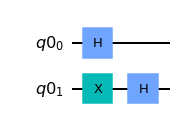

In [2]:
%matplotlib inline
qr = QuantumRegister(2)
#cr = ClassicalRegister(2)
qc = QuantumCircuit(qr)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw(output='mpl')

In [3]:
def print_state(qc):
    stv1 = qi.Statevector.from_instruction(qc)
    sim = QasmSimulator();options = {'method': 'statevector'}
    execute(qc, sim, backend_options=options)
    return stv1.draw('latex', prefix='Statevector1:')
print_state(qc)

<IPython.core.display.Latex object>

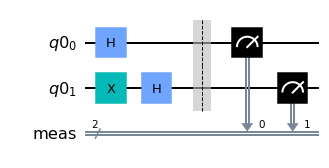

In [4]:
circuit_with_results=qc
circuit_with_results.measure_all()
circuit_with_results.draw(output='mpl')

{'01': 252, '10': 241, '00': 254, '11': 253}


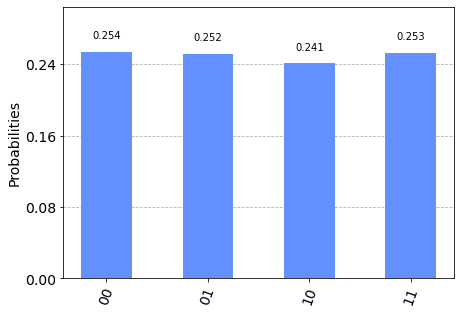

In [5]:
from qiskit.visualization import plot_histogram
# execute the quantum circuit_with_results
backend = BasicAer.get_backend('qasm_simulator') # the device to run on

result = backend.run(transpile(circuit_with_results, backend), shots=1000).result()
counts  = result.get_counts(circuit_with_results)
print(counts)
plot_histogram(counts)

In [6]:
from qiskit.tools.monitor import backend_overview, backend_monitor
#qiskit.__qiskit_version__
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account();

In [ ]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_lima')#ibmq_belem')

job=execute(circuit_with_results,backend=device,shots = 8192)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (20)    

In [ ]:
result = job.result()
plot_histogram(result.get_counts(qc))